# Estadistica Aplicada

Sesion 16, 28 de septiembre

Jesus Adrian Cordero Hernandez 1952778

GPO 41

In [12]:
## 1-Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
## Librerias especializadas
import yfinance as yf
## tamaño de grafica
plt.rcParams['figure.figsize']=(10,6)

In [14]:
walmex = yf.download('WALMEX.MX', start='2016-01-01', end='2022-12-31', progress=False)

In [15]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,42.959999,43.299999,42.299999,42.840000,35.479038,6483179
2016-01-05,42.849998,43.900002,42.540001,42.660000,35.329960,8115974
2016-01-06,42.650002,43.020000,42.070000,42.380001,35.098080,12511056
2016-01-07,41.320000,42.240002,39.259998,39.990002,33.118713,18124494
2016-01-08,40.990002,41.490002,40.700001,41.029999,33.980042,15949791


In [16]:
walmex = walmex[['Adj Close']]
walmex.head()

,Adj Close
Date,
2016-01-04,35.479038
2016-01-05,35.329960
2016-01-06,35.098080
2016-01-07,33.118713
2016-01-08,33.980042


ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2016-01-04 00:00:00'), Timestamp('2016-01-05 00:00:00'),
       Timestamp('2016-01-06 00:00:00'), ...,
       Timestamp('2022-12-28 00:00:00'), Timestamp('2022-12-29 00:00:00'),
       Timestamp('2022-12-30 00:00:00')], dtype=object)

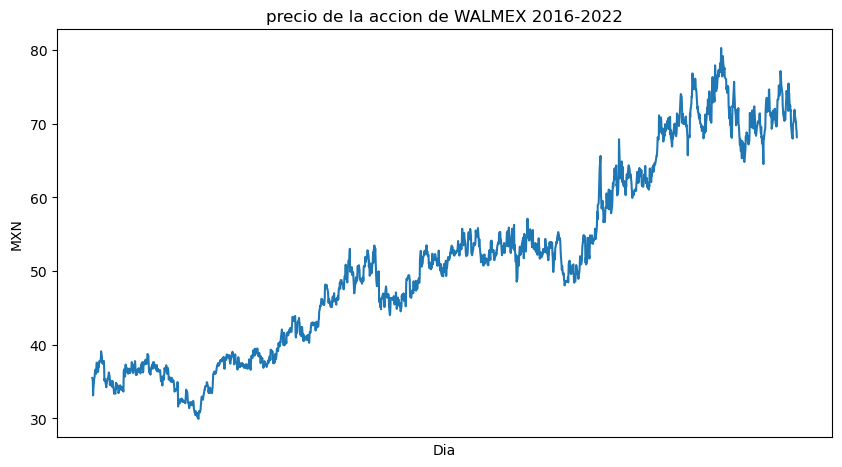

In [17]:
## Graficar
walmex['Adj Close'].plot()
plt.title('precio de la accion de WALMEX 2016-2022')
plt.ylabel('MXN')
plt.xlabel('Dia')
plt.xlim('2016-01-01','2022-12-30');
plt.plot()

In [19]:
## Calcular los PMS-10-50

## Señal de corto plazo
walmex['PMS-10'] = walmex['Adj Close'].rolling(10).mean()
## Señal de largo plazo
walmex['PMS-50'] = walmex['Adj Close'].rolling(50).mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7296\3195537845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-10'] = walmex['Adj Close'].rolling(10).mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_7296\3195537845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-50'] = walmex['Adj Close'].rolling(50).mean()


In [20]:
walmex.head()

,Adj Close,PMS-10,PMS-50
Date,,,
2016-01-04,35.479038,NaN,NaN
2016-01-05,35.329960,NaN,NaN
2016-01-06,35.098080,NaN,NaN
2016-01-07,33.118713,NaN,NaN
2016-01-08,33.980042,NaN,NaN


[]

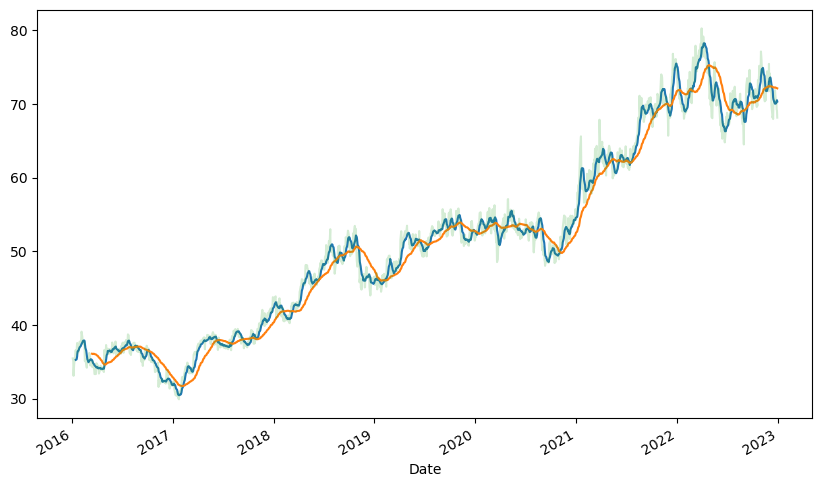

In [25]:
## Graficar
walmex['PMS-10'].plot()
walmex['PMS-50'].plot()
## Alpha=0(Transparente),Alpha=1(No transparente)
walmex['Adj Close'].plot(alpha=0.2)
plt.plot()


In [26]:
## Estrategia
walmex['estrategia'] = walmex['PMS-10'] > walmex['PMS-50']

C:\Users\Dell\AppData\Local\Temp\ipykernel_7296\2312406822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['estrategia'] = walmex['PMS-10'] > walmex['PMS-50']


## Retorno o rendimiento de la ccion 
Retorno = $\frac{P_t-P_{t-1}}{P_{t-1}}$

pct_change

In [28]:
walmex['retorno'] = walmex['Adj Close'].pct_change()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7296\1870253393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['retorno'] = walmex['Adj Close'].pct_change()


In [29]:
walmex.head()

,Adj Close,PMS-10,PMS-50,estrategia,retorno
Date,,,,,
2016-01-04,35.479038,NaN,NaN,False,NaN
2016-01-05,35.329960,NaN,NaN,False,-0.004202
2016-01-06,35.098080,NaN,NaN,False,-0.006563
2016-01-07,33.118713,NaN,NaN,False,-0.056395
2016-01-08,33.980042,NaN,NaN,False,0.026007


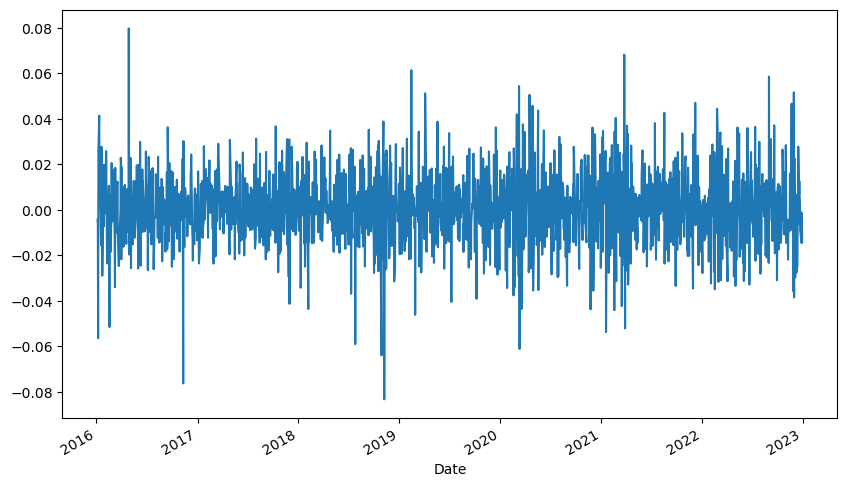

In [30]:
## Graficar los retornos 
walmex['retorno'].plot();